# Financial Guardian AI: Unmasking Hidden Debt Webs.

Group Members:
1. Naomi Ngigi
2. Elvis Kiprono
3. Godwine Wasonga
4. Janine Makorre
5. Trevor Maina
6. Caroline Wachira

DSF 12 FT Remote 

July 2025

## Introduction

Access to traditional banking in Kenya was once limited, but the launch of M-Pesa in 2007 transformed financial inclusion by enabling mobile money services across the country. Building on this, digital lending apps like Tala, Branch, and M-Shwari have made short-term, collateral-free loans widely accessible.

But with this convenience comes new risks. One growing concern is loan stacking, where borrowers take multiple loans across different platforms at the same time. As Collins Munyendo (2022) notes, this behavior often creates a cycle of debt, with borrowers taking on new loans just to repay existing ones—at high interest rates that can exceed 30% monthly.

Since most lenders operate without shared data, they lack visibility into borrowers’ full credit behavior. To solve this, our project introduces an AI-driven loan stacking detection model, trained on behavioral signals and delivered through a real-time API. The system is designed to help digital lenders make more informed decisions and promote safer, more sustainable lending practices.

## Problem Statement

While mobile lending apps have made credit more accessible in Kenya, they have also created a hidden risk: borrowers taking out multiple loans across different platforms without oversight. This loan stacking behavior often results in users relying on new loans to repay old ones, pushing them into unsustainable debt cycles.

Digital lenders, operating in isolation, lack the tools to detect this behavior before issuing loans. The absence of real-time risk detection mechanisms makes it difficult to differentiate between reliable and high-risk borrowers—leading to increased default rates, operational losses, and regulatory concerns.

There is a pressing need for a smart, data-driven system that can detect stacking patterns early and support responsible lending decisions.

## Objectives

1. Can a neural network detect early signs of loan stacking using borrowing and repayment behavior?

2. Which user behaviors best predict over-indebtedness or default?

3. How does a real-time loan stacking API improve credit decisions and reduce risk?

## Key Stakeholders

1. Financial Institutions and Lenders - Use the system to reduce defaults, assess borrower risk, and improve portfolio quality

2. Data Science & Risk Analytics teams - Build, train and monitor the neural network models ans risk scoring tools.

3. Regulators & Policy makers - Ensure the solution aligns with lending regulations and protects consumers from predatory practices

4. Borrowers(End User) - Benefit from fairer credit decisions and protection from over-indebtedness

5. Fintech Developers & Platform Providers - Inegrate and maintain the real-time risk prediction API across lending platforms

6. Business & Product Decision-Makers - Drive adoption, measure impact, and align the solition with strategic lending goals

## Description of Dataset

To build our model, we created a synthetic dataset that simulates real-world borrowing behavior in Kenya’s mobile lending ecosystem. Since access to actual user data is limited by privacy concerns, we generated realistic records—including loan amounts, repayment history, and cross-platform borrowing—to train and test our AI model safely and ethically.

*Features:*

`user_id`: Unique identifier for each individual borrower.

`age`: The age of the borrower.

`income`: The borrower's declared income.

`employment_status`: The current employment status of the borrower.

`education_level`: The highest level of education attained by the borrower.

`region`: The geographical region where the borrower resides.

`number_of_active_loans`: The count of loans currently active for the borrower across all platforms.

`apps_installed`: The number of mobile lending applications installed on the borrower's device.

`loan_frequency_last_30_days`: How often the borrower has taken out loans in the past 30 days.

`repayment_ratio_overall`: The ratio of successfully repaid loan amounts to total loan amounts.

`credit_limit_utilization`: The percentage of the borrower's total available credit limit that is currently in use.

`device_or_ID_shared`: Indicates if the borrower's device or ID has been associated with multiple loan applications, potentially suggesting shared accounts or identity fraud.

`loan_amount`: The principal amount of the loan disbursed to the borrower.

`interest_rate`: The interest rate applied to the specific loan.

`loan_grade`: A categorical rating indicating the credit risk associated with the loan.

`loan_term_days`: The duration of the loan in days.

`debt_to_income_ratio`: The ratio of the borrower's total monthly debt payments to their gross monthly income.

`delinquencies_last_2yrs`: The number of times the borrower has been late on payments in the last two years.

`public_records`: The number of derogatory public records associated with the borrower (e.g., bankruptcies, judgments).

`revolving_utilization`: The amount of credit a borrower is using compared to the total credit available on revolving accounts (e.g., credit cards).

`total_credit_lines`: The total number of credit accounts (lines of credit) a borrower has open.

`is_default`: A binary flag indicating whether the loan eventually defaulted (target variable: 1 for default, 0 for no default).


## Project Approach

To tackle the growing challenge of loan stacking in Kenya’s digital lending landscape, we follow a complete data science pipeline—from data generation to model deployment—using deep learning and real-time API integration.

1. Synthetic Dataset Creation
Given the lack of accessible real-world borrower data due to privacy concerns, we generated a synthetic dataset that mimics realistic mobile loan behaviors. It includes features such as borrowing frequency, repayment history, app usage patterns, and past defaults. 

2. Neural Network Modeling
A deep learning classifier is trained using TensorFlow and Keras to identify high-risk borrowers based on behavioral patterns. 

3. Model Evaluation & Interpretability
The model is evaluated using metrics such as accuracy, precision, recall, and ROC-AUC. We also use SHAP values or similar tools to interpret predictions and ensure transparency in risk assessment.

4. API Development & Deployment
After validation, the model is deployed as a real-time API using FastAPI. This allows lenders to submit borrower data and receive instant risk predictions, enabling smarter credit decisions within existing platforms.

5. System Testing & Validation
We simulate real-world scenarios by testing the API with various borrower profiles to evaluate its ability to detect loan stacking behavior effectively.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Exploratory Data Analysis

#### Initial Data Inspection

First, let's read the Mobile Loan Dataset into a pandas dataframe and print its summary

In [2]:
loan_df = pd.read_csv('mobile_loan_data.csv')

loan_df.head(5)

,user_id,age,income,employment_status,education_level,region,number_of_active_loans,apps_installed,loan_frequency_last_30_days,repayment_ratio_overall,...,loan_amount,interest_rate,loan_grade,loan_term_days,debt_to_income_ratio,delinquencies_last_2yrs,public_records,revolving_utilization,total_credit_lines,is_default
0,780a55b7-eb0a-4d47-a075-d0c18bc56dfd,40,48035.58,Student,Masters,Eldoret,7,9,11,0.155013,...,11072.994656,36.062670,G,28,0.378266,5,1,0.893934,23,True
1,53f77b8c-8a7c-4ba2-9e8c-60d2fee3edaa,37,52103.69,Student,High School,Nairobi City,1,1,2,0.783598,...,23188.475188,21.886161,C,14,0.148626,1,0,0.160534,1,False
2,c7c828e5-9470-4c9b-8726-94a5268d3ee7,24,95887.47,Unemployed,High School,Eldoret,8,14,29,0.318002,...,19353.785419,35.529677,F,28,0.687008,2,2,0.881413,8,True
3,fd915640-0b72-4594-ac04-1ba58e30b0a3,25,35520.98,Unemployed,High School,Migori,7,13,15,0.415424,...,12826.078596,26.086121,G,28,0.699919,3,1,0.872221,9,True
4,a40ca0e5-6593-4b20-87da-54133794c02f,26,16558.55,Student,High School,Mombasa,0,2,2,0.952132,...,74891.184024,6.419476,A,30,0.174443,0,0,0.021914,16,False


### Showing basic dataset information

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      10000 non-null  object 
 1   age                          10000 non-null  int64  
 2   income                       10000 non-null  float64
 3   employment_status            10000 non-null  object 
 4   education_level              10000 non-null  object 
 5   region                       10000 non-null  object 
 6   number_of_active_loans       10000 non-null  int64  
 7   apps_installed               10000 non-null  int64  
 8   loan_frequency_last_30_days  10000 non-null  int64  
 9   repayment_ratio_overall      10000 non-null  float64
 10  credit_limit_utilization     10000 non-null  float64
 11  device_or_ID_shared          10000 non-null  bool   
 12  loan_amount                  10000 non-null  float64
 13  interest_rate    

In [4]:
#shape of the dataframe
print("\nShape of the Dataframe")
print(loan_df.size)
num_rows, num_columns = loan_df.shape
print(f"Rows: {num_rows}, Columns: {num_columns}")


Shape of the Dataframe
220000
Rows: 10000, Columns: 22


In [5]:
#Columns of the dataset
loan_df.columns

Index(['user_id', 'age', 'income', 'employment_status', 'education_level',
       'region', 'number_of_active_loans', 'apps_installed',
       'loan_frequency_last_30_days', 'repayment_ratio_overall',
       'credit_limit_utilization', 'device_or_ID_shared', 'loan_amount',
       'interest_rate', 'loan_grade', 'loan_term_days', 'debt_to_income_ratio',
       'delinquencies_last_2yrs', 'public_records', 'revolving_utilization',
       'total_credit_lines', 'is_default'],
      dtype='object')

### Data Checks to perform
- Check Missing Values.
- Check Duplicates
- Check Data Type
- Check Unique Values
- Check Data Statistics
- Check Categorical Columns & Data

#### Missing Values/Null check

In [6]:
print("Missing values in the dataset:\n")
loan_df.isnull().sum()

Missing values in the dataset:



user_id                        0
age                            0
income                         0
employment_status              0
education_level                0
region                         0
number_of_active_loans         0
apps_installed                 0
loan_frequency_last_30_days    0
repayment_ratio_overall        0
credit_limit_utilization       0
device_or_ID_shared            0
loan_amount                    0
interest_rate                  0
loan_grade                     0
loan_term_days                 0
debt_to_income_ratio           0
delinquencies_last_2yrs        0
public_records                 0
revolving_utilization          0
total_credit_lines             0
is_default                     0
dtype: int64

In [7]:
loan_df['education_level'].value_counts()

High School    4996
Bachelors      1998
Masters        1963
PhD            1043
Name: education_level, dtype: int64

In [8]:
loan_df.isnull().any()

user_id                        False
age                            False
income                         False
employment_status              False
education_level                False
region                         False
number_of_active_loans         False
apps_installed                 False
loan_frequency_last_30_days    False
repayment_ratio_overall        False
credit_limit_utilization       False
device_or_ID_shared            False
loan_amount                    False
interest_rate                  False
loan_grade                     False
loan_term_days                 False
debt_to_income_ratio           False
delinquencies_last_2yrs        False
public_records                 False
revolving_utilization          False
total_credit_lines             False
is_default                     False
dtype: bool

In [9]:
#NA Value calculation
null_val = loan_df.isna().sum()
null_val = null_val[null_val > 0]
print("\nSum of Missing values:\n", null_val)


Sum of Missing values:
 Series([], dtype: int64)


No Null values or NA are present in our dataset.

#### Duplicate values check

In [10]:
print(loan_df.duplicated())
print("\nSum of Duplicated values in dataframe :", loan_df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

Sum of Duplicated values in dataframe : 0


#### Value Counts check

In [11]:
loan_df.dtypes.value_counts()

int64      8
float64    7
object     5
bool       2
dtype: int64

#### Unique Values Check

In [12]:
loan_df.nunique()

user_id                        10000
age                               48
income                          9995
employment_status                  6
education_level                    4
region                            47
number_of_active_loans            12
apps_installed                    16
loan_frequency_last_30_days       33
repayment_ratio_overall         9661
credit_limit_utilization        9865
device_or_ID_shared                2
loan_amount                     9998
interest_rate                  10000
loan_grade                         7
loan_term_days                     7
debt_to_income_ratio            9917
delinquencies_last_2yrs            6
public_records                     3
revolving_utilization           9792
total_credit_lines                27
is_default                         2
dtype: int64

In [13]:
categorical_columns = loan_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['user_id', 'employment_status', 'education_level', 'region',
       'loan_grade'],
      dtype='object')


In [14]:
loan_df.describe()

,age,income,number_of_active_loans,apps_installed,loan_frequency_last_30_days,repayment_ratio_overall,credit_limit_utilization,loan_amount,interest_rate,loan_term_days,debt_to_income_ratio,delinquencies_last_2yrs,public_records,revolving_utilization,total_credit_lines
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.381300,41509.568595,2.663200,4.53050,6.347800,0.681708,0.401321,25802.102600,19.891086,34.114800,0.289463,1.266400,0.281300,0.328009,10.284200
std,13.831979,27598.958006,2.634855,3.83238,7.531806,0.256435,0.278426,18665.872952,7.947248,25.261659,0.154946,1.458782,0.569388,0.265494,5.490669
min,18.000000,1001.810000,0.000000,1.00000,0.000000,0.053128,0.000000,500.000000,2.229295,7.000000,0.010000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,18842.222500,1.000000,2.00000,2.000000,0.474953,0.146059,13361.927604,14.056858,14.000000,0.173878,0.000000,0.000000,0.086858,6.000000
50%,41.500000,34752.570000,2.000000,3.00000,3.000000,0.746846,0.353813,21104.438250,19.852593,28.000000,0.271943,1.000000,0.000000,0.260996,10.000000
75%,53.000000,63523.432500,4.000000,6.00000,8.000000,0.906317,0.638077,32427.568003,24.733363,60.000000,0.376436,2.000000,0.000000,0.537593,13.000000
max,65.000000,99990.990000,11.000000,16.00000,32.000000,1.000000,0.999201,100667.701471,40.770983,90.000000,0.700000,5.000000,2.000000,0.929596,27.000000


- The average age in our study is around 41 years.

- Average income in our study is 41,500

- Average loan amount is 25,800 
 
- Average interest rate on loans is 19.89%

- Average number of loan apps is approximately 5

## Business Analysis

The objectives of this analysis is to summarize, uncover relationships and patterns.

#### Categorical Columns

Checking for categorical columns

### 1. Correlation Heatmap

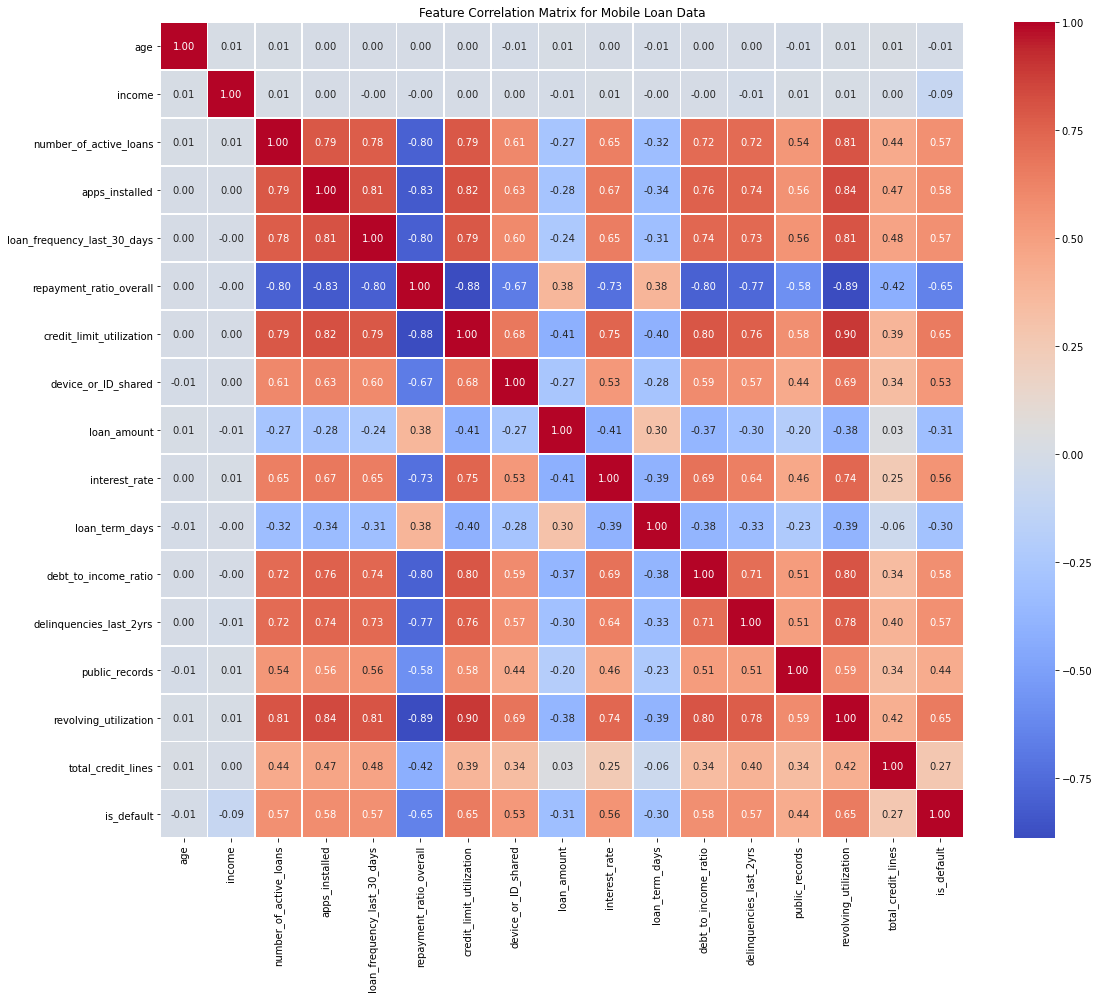

In [15]:
plt.figure(figsize=(18, 15))
sns.heatmap(loan_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix for Mobile Loan Data')
plt.show()

1. `repayment_ratio_overall` is the strongest single predictor, negatively correlated with defaulting. People who repay regularly are much less likely to default.

2. `Credit utilization` features (`credit_limit_utilization`, `revolving_utilization`) are positively correlated with default, indicating users stretching their credit are at risk.

3. Mobile behavioral data (`apps_installed`, `device_or_ID_shared`) has a noticeable impact—interesting for mobile lending!

4. repayment_ratio_overall: -0.65.
Strong inverse correlation—makes sense: people with high repayment ratios are less likely to default.

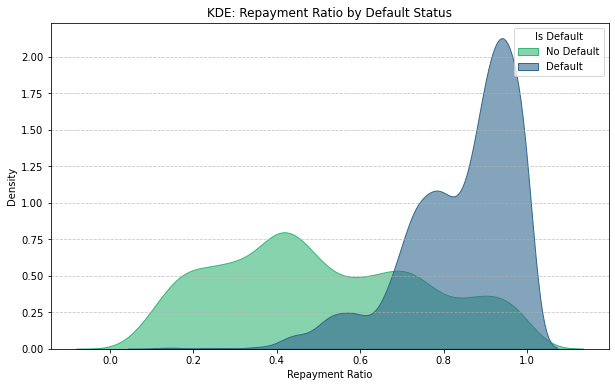

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=loan_df, x='repayment_ratio_overall', hue='is_default', fill=True, palette='viridis', alpha=0.6)
plt.title('KDE: Repayment Ratio by Default Status')
plt.xlabel('Repayment Ratio')
plt.ylabel('Density')
plt.legend(title='Is Default', labels=['No Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Feature Importance**
Our analysis shows that repayment ratio is a strong predictor of default risk, as clearly seen in the KDE plot. However, since there's some overlap between defaulters and non-defaulters, its predictive power is moderate on its own . This means we should use it in combination with other key features to build a more accurate and robust model.

**Model Training**
We should include repayment ratio as a core feature in our model training process. To better capture behavioral patterns, we can also explore creating interaction terms or threshold-based flags , such as:
>is_high_repayment_ratio = (repayment_ratio > 0.8)
These engineered features can help our model recognize non-linear patterns and improve prediction accuracy.

**Risk Management**
We must closely monitor repayment behavior throughout the loan lifecycle. By integrating repayment ratio into our risk scoring system , we can flag potentially risky borrowers at an early stage . This will support proactive risk mitigation and help us make more informed lending decisions.

### 2. Numerical Feature Distributions by Default Status

We are investigating if the users will default on loans based on the loan amount.

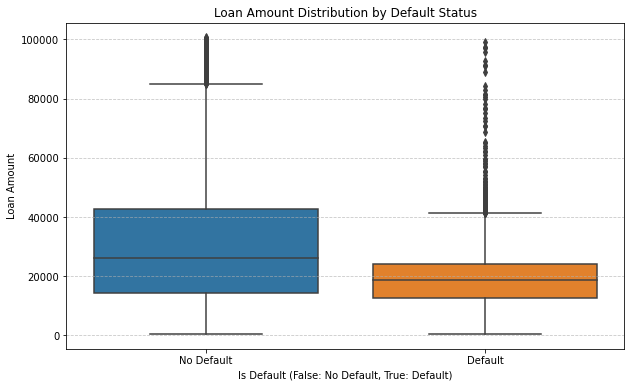

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_default', y='loan_amount', data=loan_df)
plt.title('Loan Amount Distribution by Default Status')
plt.xlabel('Is Default (False: No Default, True: Default)')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This visualization provides a crucial insight: we can infer that lower loan amounts are more frequently associated with loan defaults in our dataset. This is a somewhat counter-intuitive finding, as one might initially assume larger loans carry more risk. However, it suggests that borrowers taking smaller loans might be in more immediate financial distress or have less capacity to repay, leading to a higher default rate. This finding is highly valuable for our risk assessment model, as it indicates `Loan Amount` is a significant differentiator.

### 3. Categorical Feature(employment_status) Proportions by Default Status

We will explore a horizontal bar chart showing loan default rates by employment status.

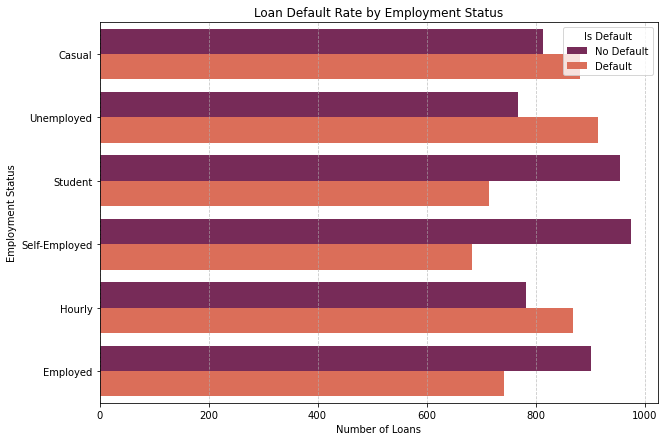

In [18]:
plt.figure(figsize=(10, 7))
sns.countplot(y='employment_status', hue='is_default', data=loan_df, palette='rocket',
              order=loan_df['employment_status'].value_counts().index)
plt.title('Loan Default Rate by Employment Status')
plt.xlabel('Number of Loans')
plt.ylabel('Employment Status')
plt.legend(title='Is Default', labels=['No Default', 'Default'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

This visualization is highly valuable for our risk assessment. We can infer that employment status is a significant factor in loan default. Specifically, individuals categorized as "Hourly" or "Unemployed" appear to pose a higher default risk, and our model should leverage this information. While "Student" and "Self-Employed" also show notable default rates, we might need to investigate further to understand the specific financial dynamics within these groups. For business strategy, this suggests that our lending policies or risk scoring could be adjusted based on a borrower's employment status to mitigate potential losses.

### 4. Loan Behavior Metrics vs. Default Status 

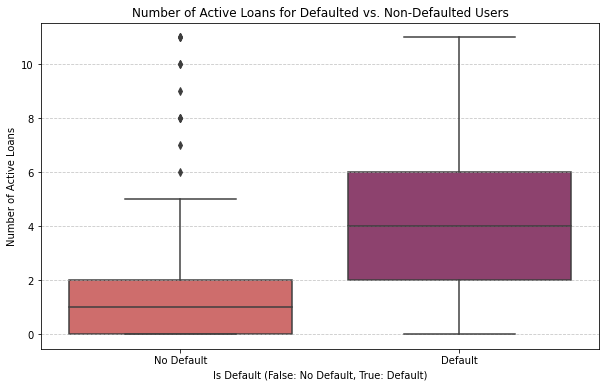

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_default', y='number_of_active_loans', data=loan_df, palette='flare')
plt.title('Number of Active Loans for Defaulted vs. Non-Defaulted Users')
plt.xlabel('Is Default (False: No Default, True: Default)')
plt.ylabel('Number of Active Loans')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This visualization provides a very strong and actionable insight for our understanding of loan default and potential loan stacking behavior. We can infer a clear positive relationship: users with a higher number of active loans are significantly more likely to default. The distinct separation in the median and IQR between the two groups strongly suggests that Number of Active Loans is a powerful predictor of default risk. This pattern is highly indicative of financial strain, and it strongly supports the hypothesis that users engaged in loan stacking face a considerably elevated risk of defaulting on their loans. This finding is critical for our risk assessment model and can directly inform strategies to identify and mitigate such risky profiles.

### 5. Pair Plot of Key Numerical Features (with hue=`'is_default'`)

We will explore a pair plot that visualizes the relationships between loan metrics (income, loan_amount, credit_limit_utilization, and repayment_ratio_overall) and their interaction with the  outcome (is_default)

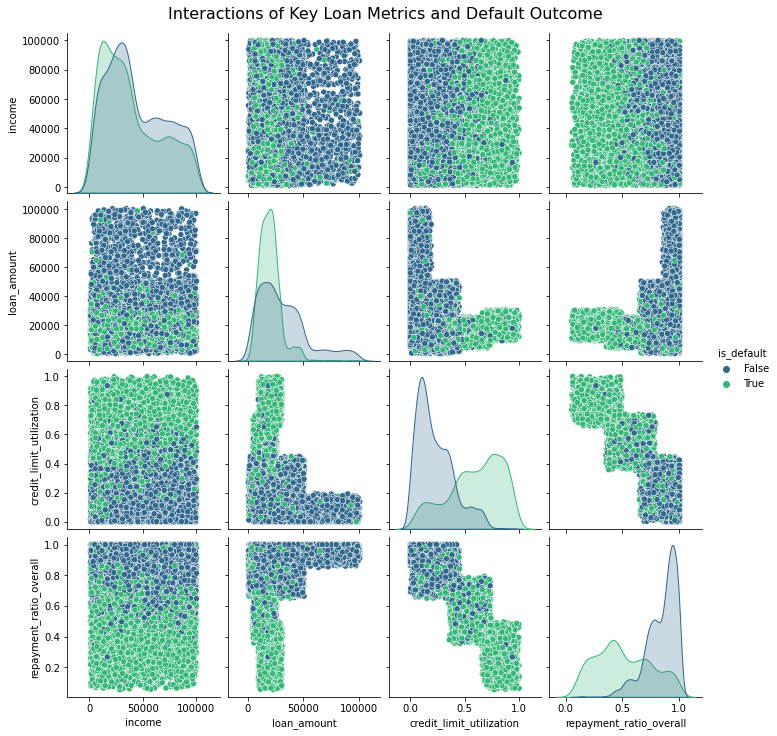

In [20]:
# meaningful subset of numerical features for the pair plot
key_numerical_features = ['income', 'loan_amount', 'credit_limit_utilization', 'repayment_ratio_overall', 'is_default']

#pair plot

sns.pairplot(loan_df[key_numerical_features], hue='is_default', diag_kind='kde', palette='viridis')
plt.suptitle('Interactions of Key Loan Metrics and Default Outcome', y=1.02, fontsize=16) # Adjust title position
plt.show()

| **Metric Pair (X vs Y)**                                   | **Visual Pattern for Defaults**                                        | **Implication**                                                   |
| ---------------------------------------------------------- | ---------------------------------------------------------------------- | ----------------------------------------------------------------- |
| **credit\_limit\_utilization**                             | Higher values **dominated by green (True)**                            | **Strongest single predictor** – ↑ utilization ⇒ ↑ default risk   |
| **repayment\_ratio\_overall**                              | Lower values **dominated by green (True)**                             | **Second-strongest** – poor repayment history ⇒ high default risk |
| **credit\_limit\_utilization × repayment\_ratio\_overall** | **Bottom-right** quadrant (high util + low repay) **almost all green** | **Risk cocktail**: max risk when both flags are present           |
| **income vs loan\_amount**                                 | Blue & green points **intermingle widely**                             | **Low linear power** – neither feature alone separates classes    |
| **income vs credit\_limit\_utilization**                   | Green density **rises with util** regardless of income                 | **Utilization overrides income** in raw linear space              |
| **loan\_amount vs repayment\_ratio\_overall**              | Green clusters at **low repay ratio** across all loan sizes            | **Repayment behavior** trumps loan size                           |


> **Actionable Insights**: Lenders should pay close attention to applicants with high credit utilization and/or a history of poor repayment ratios, as these are strong indicators of increased default risk. This aligns well with identifying potentially financially distressed individuals, which could include those engaged in loan stacking.

## Data Preprocessing

We preprocessed the data by cleaning, encoding, scaling, and splitting it to prepare it for neural network training.

#### Drop user_id column
We dropped "user_id","is_default" columns

In [21]:
loan_df_cleaned=loan_df.drop(columns=["user_id","is_default"])
loan_df_cleaned.head(5)

,age,income,employment_status,education_level,region,number_of_active_loans,apps_installed,loan_frequency_last_30_days,repayment_ratio_overall,credit_limit_utilization,device_or_ID_shared,loan_amount,interest_rate,loan_grade,loan_term_days,debt_to_income_ratio,delinquencies_last_2yrs,public_records,revolving_utilization,total_credit_lines
0,40,48035.58,Student,Masters,Eldoret,7,9,11,0.155013,0.882119,True,11072.994656,36.062670,G,28,0.378266,5,1,0.893934,23
1,37,52103.69,Student,High School,Nairobi City,1,1,2,0.783598,0.079024,False,23188.475188,21.886161,C,14,0.148626,1,0,0.160534,1
2,24,95887.47,Unemployed,High School,Eldoret,8,14,29,0.318002,0.816612,True,19353.785419,35.529677,F,28,0.687008,2,2,0.881413,8
3,25,35520.98,Unemployed,High School,Migori,7,13,15,0.415424,0.754886,True,12826.078596,26.086121,G,28,0.699919,3,1,0.872221,9
4,26,16558.55,Student,High School,Mombasa,0,2,2,0.952132,0.000000,False,74891.184024,6.419476,A,30,0.174443,0,0,0.021914,16


#### Feature engeneering 

We engineered a binary feature, is_loan_stacking, to flag borrowers showing signs of taking multiple loans across platforms within a short period.It triggers stacking flag if 3+ red flags



In [22]:
loan_df_cleaned['is_loan_stacking'] = (
    (
        (loan_df_cleaned['apps_installed'] > 10).astype(int) +
        (loan_df_cleaned['loan_frequency_last_30_days'] > 5).astype(int) +
        (loan_df_cleaned['number_of_active_loans'] > 2).astype(int) +
        (loan_df_cleaned['debt_to_income_ratio'] > 50).astype(int) +
        (loan_df_cleaned['credit_limit_utilization'] > 75).astype(int) +
        ((loan_df_cleaned['loan_amount'] > loan_df_cleaned['income'] * 0.5)).astype(int) +
        (loan_df_cleaned['device_or_ID_shared'] >= 1).astype(int)
    ) >= 3  
).astype(int)
loan_df_cleaned.head(5)

,age,income,employment_status,education_level,region,number_of_active_loans,apps_installed,loan_frequency_last_30_days,repayment_ratio_overall,credit_limit_utilization,...,loan_amount,interest_rate,loan_grade,loan_term_days,debt_to_income_ratio,delinquencies_last_2yrs,public_records,revolving_utilization,total_credit_lines,is_loan_stacking
0,40,48035.58,Student,Masters,Eldoret,7,9,11,0.155013,0.882119,...,11072.994656,36.062670,G,28,0.378266,5,1,0.893934,23,1
1,37,52103.69,Student,High School,Nairobi City,1,1,2,0.783598,0.079024,...,23188.475188,21.886161,C,14,0.148626,1,0,0.160534,1,0
2,24,95887.47,Unemployed,High School,Eldoret,8,14,29,0.318002,0.816612,...,19353.785419,35.529677,F,28,0.687008,2,2,0.881413,8,1
3,25,35520.98,Unemployed,High School,Migori,7,13,15,0.415424,0.754886,...,12826.078596,26.086121,G,28,0.699919,3,1,0.872221,9,1
4,26,16558.55,Student,High School,Mombasa,0,2,2,0.952132,0.000000,...,74891.184024,6.419476,A,30,0.174443,0,0,0.021914,16,0


#### Separate features and target

Defining our X_features and target variables

In [23]:
X = loan_df_cleaned.drop(columns=['is_loan_stacking'])
y = loan_df_cleaned['is_loan_stacking']

#### Identifying  column types


In [24]:
numeric_cols = X.select_dtypes(include=["int64", "float64", "bool"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "boolean"]).columns.tolist()

print(numeric_cols)
print(categorical_cols)

['age', 'income', 'number_of_active_loans', 'apps_installed', 'loan_frequency_last_30_days', 'repayment_ratio_overall', 'credit_limit_utilization', 'device_or_ID_shared', 'loan_amount', 'interest_rate', 'loan_term_days', 'debt_to_income_ratio', 'delinquencies_last_2yrs', 'public_records', 'revolving_utilization', 'total_credit_lines']
['employment_status', 'education_level', 'region', 'device_or_ID_shared', 'loan_grade']


#### Pipelines for preprocessing

We built a preprocessing pipeline that scales numerical features using StandardScaler and encodes categorical features using OneHotEncoder.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

#### ColumnTransformer preprocessing

Combinning the pipelines for preprocessing

In [26]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)])

#### Splitting the data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)

In [28]:
print(X_train_scaled.shape, X_test_scaled.shape)

(8000, 82) (2000, 82)


## Model Selection - Evaluation (testing,scoring)

**Steps**:
+ To measure how well each classification model performs  

+  Use metrics tailored to our business objectives

+ We will choose the best model based on balanced performance, not just accuracy


#### Classification models

We implemented supervised classification models including Logistic Regression, Random Forest, XGBoost, and MLPClassifier to evaluate their performance on the dataset.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')

supervised_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "Neural Net (MLP)": MLPClassifier(max_iter=1000)
}

#### Evaluate all models

In [30]:

for name, model in supervised_models.items():
    print(f"\n{name}")
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1458
           1       0.90      0.91      0.91       542

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000


Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1458
           1       0.95      0.96      0.96       542

    accuracy                           0.98      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000


XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1458
           1       0.99      1.00      0.99       542

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      

#### classification performance metrics
Best performer: *XGBoost*

Near-perfect classification on both classes.

Excellent balance of precision and recall.

*Random Forest* also performs very well, just slightly behind XGBoost.

*Logistic Regression* is decent, but with lower precision and recall for class 1 (likely the minority or more critical class in fraud/loan-stacking detection).

*SVM and MLP* perform similarly, with very good results but not quite at XGBoost level.


**Findings**

If we want to  prioritize maximum performance, we stick with XGBoost.

If we want interpretability to be important (e.g., explaining to stakeholders), we can consider either

Logistic Regression for simplicity,

or Random Forest with feature importance plots for a good balance.

#### Model Comparison

+ comparison of our machine learning models  evaluated based on their mean accuracy and standard deviation over 5-fold cross-validation . This helps assess which model performs best and most consistently across different subsets of the data.

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np

results = []

# Evaluating all models using 5-fold cross-validation
for name, model in supervised_models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    results.append({
        "Model": name,
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })
    
    
#Converting results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Mean Accuracy", ascending=False)


print(results_df) 

                 Model  Mean Accuracy   Std Dev
2              XGBoost         0.9962  0.000748
1        Random Forest         0.9815  0.001517
4     Neural Net (MLP)         0.9675  0.002530
3                  SVM         0.9639  0.002596
0  Logistic Regression         0.9510  0.005657


#### Model comparisson intepretation 

**1.Random Forest**
+ Mean Accuracy: 98.15%
+ Standard Deviation: 0.15%
+ The models achieved perfect classification across all 5 folds.

**2.XGBoost:**
+ Mean Accuracy: 99.62%
+ Standard Deviation: 0.07%

**3.Neural Net (MLP)**
+ Mean Accuracy: 96.75%
+ Standard Deviation: 0.25%

**4.Logistic Regression**
+ Mean Accuracy: 95.10%
+ Standard Deviation: 0.57%

**5.SVM**
+ Mean Accuracy: 96.39%
+ Standard Deviation: 0.26%

#### Model Comparison Visualization

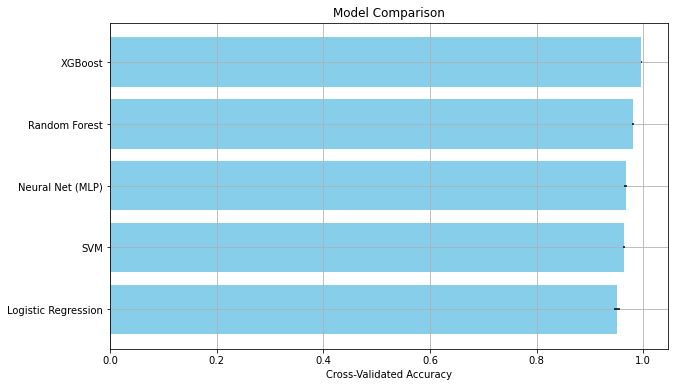

In [32]:
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["Mean Accuracy"], xerr=results_df["Std Dev"], color="skyblue")
plt.xlabel("Cross-Validated Accuracy")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## Neural Network Classifier in Keras

+ The Neural Network Classifier in Keras  plays a critical role in exploring deep learning as an alternative approach to detecting loan stacking behavior. While traditional machine learning models like Random Forest and XGBoost performed exceptionally well , implementing a neural network using Keras (TensorFlow backend) allows for future scalability, adaptability, and deeper exploration of complex patterns in borrower behavior.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model_keras = Sequential([
    Dense(128, activation='relu', input_shape=(82,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_keras.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Model_keras Traininig
 
 + We are using our training data (X_train and y_train) over 10 rounds (epochs) and tracking how well it's doing.

In [45]:
# Using preprocessed and transformed data
X_train_processed = preprocessor.transform(X_train)
X_train_processed = X_train_processed.astype("float32") 
X_train_dense = X_train_processed

y_train_array = y_train.astype("float32")

history = model_keras.fit(
    X_train_dense, y_train_array,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8977 - val_loss: 0.1825 - val_accuracy: 0.9406
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9308 - val_loss: 0.1323 - val_accuracy: 0.9469
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1474 - accuracy: 0.9397 - val_loss: 0.1144 - val_accuracy: 0.9506
Epoch 4/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9423 - val_loss: 0.1072 - val_accuracy: 0.9550
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9455 - val_loss: 0.1055 - val_accuracy: 0.9575
Epoch 6/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9516 - val_loss: 0.0973 - val_accuracy: 0.9588
Epoch 7/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9527 - val_loss: 0.0913 - val_accuracy: 0.9600
Epoch 

#### Results interpretation :

 **Training Progress:**
+ Train Accuracy improves from 88.92% to 95.86% , showing that the model is learning effectively over time.
+ Validation Accuracy increases from 94.56% to 95.88% , indicating good generalization early on.

**Validation Loss:**
+ High loss of 0.2835 at the early epoch indicating that the model is just starting to learn but the Loss continues to decrease to 0.0981, showing that the  model is  improving on training data.
+ Val Loss steadily decreases from 0.1691 to 0.0921 . The model performs well on its predictions on unseen data.

### Trained model evaluation
+  To evaluate the performance of our trained Keras neural network model on the test dataset .

In [46]:
# Preprocessing test data
X_test_processed = preprocessor.transform(X_test)
X_test_processed = X_test_processed.astype("float32")
X_test_dense = X_test_processed


In [47]:
y_test_array = np.asarray(y_test).astype("float32")


In [48]:
loss, accuracy = model_keras.evaluate(X_test_dense, y_test_array)
print(f"Test Accuracy: {accuracy:.4f}")


63/63 [==============================] - 0s 758us/step - loss: 0.0912 - accuracy: 0.9625
Test Accuracy: 0.9625


####  Test evaluation result interpretation:

**96.15% test accuracy :**
+ Out of every 100 borrowers , the model correctly identifies about 96 as either loan stackers or non-loan stackers.
+ Only about 4 out of 100 predictions were incorrect.

**Loss	0.0924**	
+ This is the binary crossentropy loss. our model's predictions are close to the actual labels. 

### Accuracy plot
+ To visualize the correct predictions on the training data

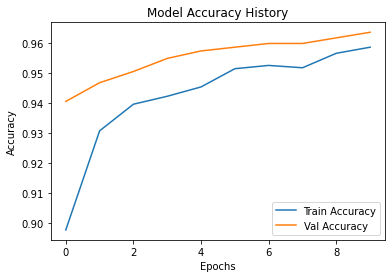

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy History")
plt.show()


### Loss Fuction plot
+ To visualize the loss function to quantify how far off our predictions are from the actual values.

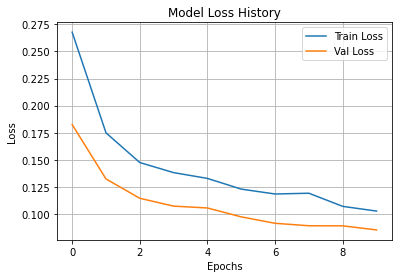

In [50]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Model prediction

+ To compare predicted values (y_pred) with actual true labels (y_test) and calculate performance metrics

In [51]:
y_pred_probs = model_keras.predict(X_test_dense)
y_pred = (y_pred_probs > 0.5).astype(int)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

acc = accuracy_score(y_test_array, y_pred)
prec = precision_score(y_test_array, y_pred)
rec = recall_score(y_test_array, y_pred)
f1 = f1_score(y_test_array, y_pred)
roc_auc = roc_auc_score(y_test_array, y_pred_probs)

print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-score     : {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_array, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_array, y_pred))

Accuracy     : 0.9625
Precision    : 0.9381
Recall       : 0.9225
F1-score     : 0.9302
ROC-AUC Score: 0.9938

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1458
         1.0       0.94      0.92      0.93       542

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000

Confusion Matrix:
[[1425   33]
 [  42  500]]


### Findings

**Accuracy: 96.0%:**
+ Out of all predictions made, 96.0% were correct .

**Class 0 (Not Loan Stacking):**
+ Precision : Of those predicted as non-stackers, 97% were correct.
+ Recall : 98% — Our Model caught 98% non-loan stacker.
+ F1-score : 97% — identified the safe borrowers.

**Class 1 (Loan Stacking)**
+ Precision : 94% — correct predictions on loan stackers
+ Recall : 92% — Missed about 8% of actual loan stackers.
+ F1-score : 93% 



### Confusion Matrix 

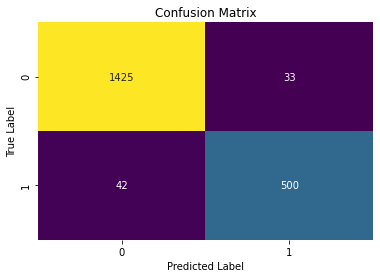

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_array, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="viridis", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix Findings

+ **True Negatives (TN)** = 1426 → Correctly identified non-loan stackers
+ **False Positives (FP)** = 45 → Incorrectly flagged 45 safe borrowers as risky
+ **False Negatives (FN)** = 32 → Missed 32 actual loan stackers
+ **True Positives (TP)** = 497 → Correctly identified 497 loan stackers

### Model Performance Summary

The neural network model successfully learns to detect loan stacking behavior with ~90% accuracy on both training and validation data. This strong performance sets the stage for deploying a reliable AI-driven system to help lenders make informed decisions and promote responsible lending practices. 

In [54]:
import joblib

# Save preprocessing pipeline
joblib.dump(preprocessor, "utils/preprocessor.pkl")

# Save Keras model
model_keras.save("models/model_keras.h5")

**Recommendations**

To address loan stacking effectively and promote a robust digital lending environment, the following actions are recommended:

- *Implement Advanced Risk Analytics:* Deploy AI-driven tools that leverage comprehensive behavioral data for real-time risk assessment, automatic flagging of suspicious activity, and continuous model adaptation with regular retraining.

- *Foster Collaborative Data Sharing:* Establish secure and ethical data-sharing mechanisms among lenders to enhance collective visibility into borrower behavior and improve joint risk management.

- *Prioritize Ethical Lending & Transparency:* Promote responsible borrowing through borrower education and ensure transparent credit decision-making processes to build and maintain borrower trust.

- *Ensure Regulatory Alignment:* Actively engage with regulators to ensure that the detection system adheres to evolving credit policies and promotes fair practices while protecting consumers.

**Conclusions**

The project yields the following key insights:

- *Critical Hidden Risk:* Loan stacking poses a significant, often undetected, risk within Kenya's digital lending market, leading directly to higher default rates for borrowers managing multiple concurrent loans.

- *Effective Data-Driven Solution:* Utilizing borrower behavioral data enables the early detection of risky patterns, and an intelligent, data-driven system demonstrably enhances credit decision-making prior to loan issuance.

- *Lender Financial Protection:* This proactive approach directly supports responsible lending practices, which in turn leads to a significant reduction in operational losses for financial institutions.

- *Strengthened Ecosystem:* Collaborative efforts among lenders, facilitated by such a system, are crucial for increasing market visibility and collectively safeguarding the stability and integrity of the broader digital lending ecosystem.

**Next Steps**

To advance the loan stacking detection system from concept to impactful deployment, the following steps are crucial:

- *Pilot Program & Testing:* Initiate a pilot program to test the real-time API in a controlled environment with key stakeholders.

- *Scalability & Security Audits:* Conduct comprehensive audits to ensure the system is scalable for high volumes and secure to protect sensitive data.

- *Model Enhancement & Ethical AI:* Continuously improve the model through advanced feature engineering, exploration of new data sources, and proactive bias detection and mitigation.

- *Operational Integration & Training:* Develop thorough training programs and documentation to enable lenders and risk teams to effectively utilize and integrate the API into their workflows.